# Критерии Стьюдента

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

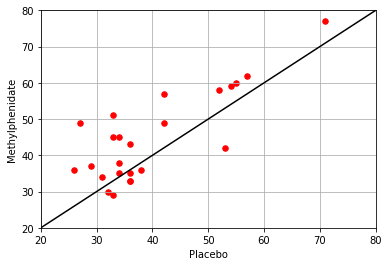

In [4]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

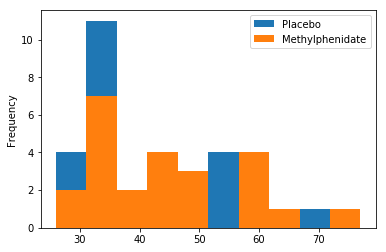

In [5]:
data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [6]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [8]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

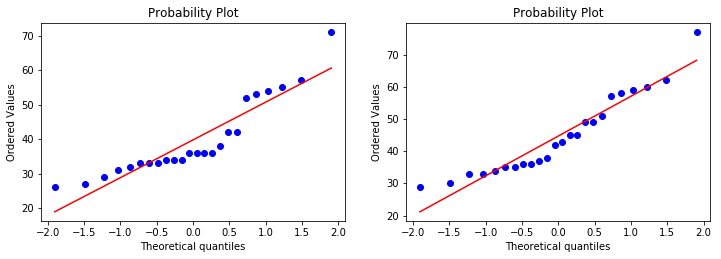

In [9]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [10]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [11]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [12]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [14]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

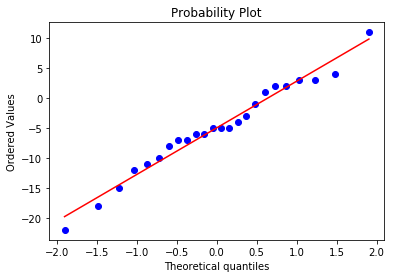

In [15]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [16]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [17]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [18]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


### Practice Quiz
4.
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [24]:
mu = 9.5
sigma = 0.4
n = 160
x_hat = 9.57

In [46]:
z = (x_hat - mu)/(sigma/sqrt(n))
F_n = stats.norm.cdf(abs(z))
p = 2*(1 - F_n)
print("{:.4f}".format(p))

0.0269


6.
Имеются данные о стоимости и размерах 53940 бриллиантов:
`diamonds.txt`

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции `sklearn.cross_validation.train_test_split` (зафиксируйте `random state = 1`). 

На обучающей выборке настройте две регрессионные модели:
* линейную регрессию с помощью `LinearRegression` без параметров
* случайный лес с помощью `RandomForestRegressor` с `random_state=1`.

In [59]:
df = pd.read_table('diamonds.txt')
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [60]:
X = df.drop('price', axis=1)
y = df.price

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [93]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
np.mean(cross_val_score(lr, X_test, y_test, cv=10, scoring='neg_mean_absolute_error'))

-876.7746702138226

In [99]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
np.mean(cross_val_score(rf, X_test, y_test, cv=10, scoring='neg_mean_absolute_error'))

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-825.3501616112941

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости $\alpha=0.05$?

In [74]:
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
lr_dif = abs(lr_preds - y_test)
rf_dif = abs(rf_preds - y_test)

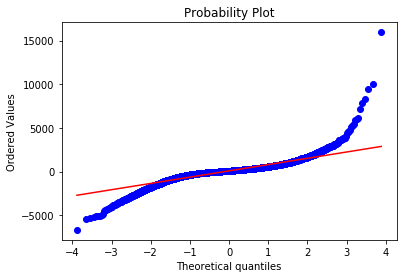

In [81]:
stats.probplot(lr_dif - rf_dif, dist = "norm", plot = pylab)
pylab.show()

In [85]:
stats.ttest_rel(lr_dif, rf_dif)

Ttest_relResult(statistic=12.353112448860516, pvalue=7.233766672089577e-35)

7. 
В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [88]:
print("95%% confidence interval: [%.0f, %.0f]" % DescrStatsW(lr_dif - rf_dif).tconfint_mean())

95% confidence interval: [70, 97]
